# Sygnały akustyczne

## Laboratorium 05 - Projektowanie filtrów IIR (NOI)

Karol Działowski

Celem laboratorium było zaprojektowanie i porównanie dwóch różnych filtrów NOI o dowolnie wybranych parametrach za pomocą gotowych funkcji na podstawie materiałów wykładowych.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift

import warnings
warnings.filterwarnings('ignore')

In [74]:
def plot_charakterystyka(w, h, fs):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    x = w * fs / (2 * np.pi)
    y = 20 * np.log10(np.abs(h))
    axes[0].plot(x, y)
    axes[0].set_ylim([-250, 20])
    axes[0].set_xlabel("Częstotliwość [Hz]")
    
    y = np.arctan2(np.imag(h), np.real(h))
    y = np.degrees(np.unwrap(y))
    axes[1].plot(x, y)
    axes[1].set_xlabel("Częstotliwość [Hz]")
    plt.show()

## Filtr dolno-przepustowy Butterwortha

In [75]:
fs = 22050  # czestotliwosc probkowania
n = 10  # rzad filtra
fc = 6000  # czestotliwosc odciecia

b, a = signal.iirfilter(n, fc / (fs / 2), btype='lowpass', ftype='butter')
w, h = signal.freqz(b, a)
b_butter = b

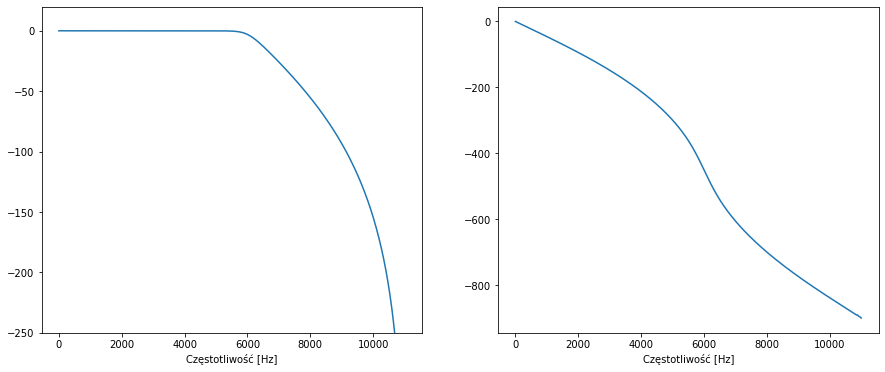

In [76]:
plot_charakterystyka(w, h, fs)

## Filtr dolno-przepustowy Czebyszewa typu 1

In [77]:
b, a = signal.iirfilter(n, fc / (fs / 2), btype='lowpass', ftype='cheby1', rp=20)
w, h = signal.freqz(b, a)
b_cheby1 = b

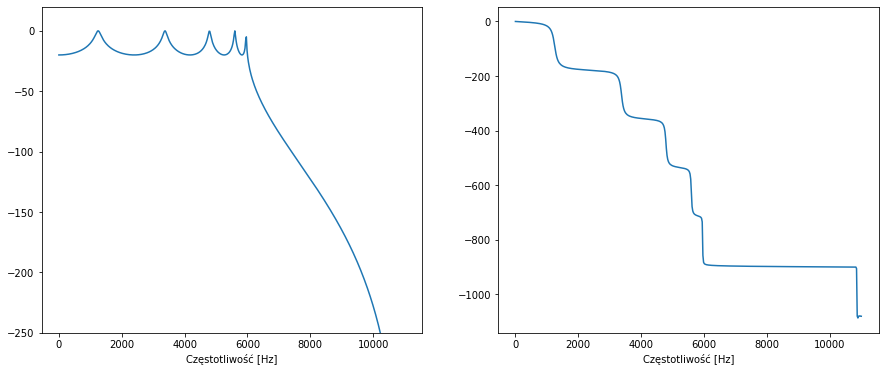

In [78]:
plot_charakterystyka(w, h, fs)

## Filtracja wybranego sygnału dźwiękowego

In [79]:
from scipy import signal
from scipy import fft
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile

In [80]:
def plot_widmo(y, fs, title):
    widmo_amp = 20 * np.log10(np.abs(np.fft.rfft(y)) / (len(y)//2))
    f = np.fft.rfftfreq(len(y), 1/fs)
    plt.plot(f, widmo_amp)
    plt.xlabel('częstotliwość [Hz]')
    plt.ylabel('amplituda widma')
    plt.ylim([-300, 0])
    plt.title(title)
    plt.show()

### Wczytanie wybranego pliku

In [81]:
y, sr = librosa.load("./data/dziendobry.wav", mono=True)
y = y.astype('float32')

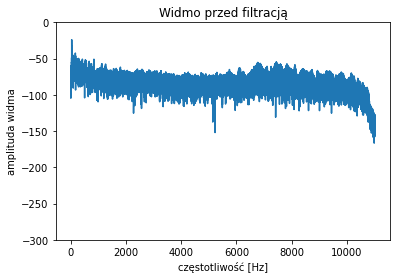

In [82]:
plot_widmo(y, sr, 'Widmo przed filtracją')

### Filtracja

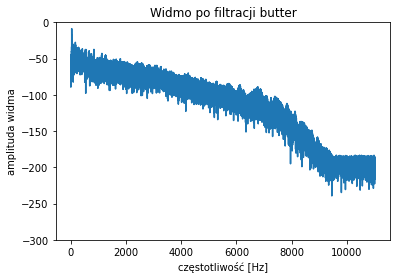

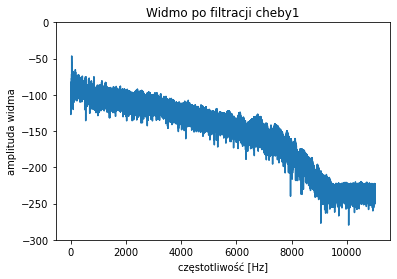

In [83]:
def filtering(y, b, name):
    filtered_y = signal.convolve(y.astype('float32'), b.astype('float32'))
    wavfile.write(f"./data/filtered_{name}.wav", sr, filtered_y)
    return filtered_y

filtered_y_butter = filtering(y, b_butter, "butter")
plot_widmo(filtered_y_butter, sr, 'Widmo po filtracji butter')
filtered_y_cheby1 = filtering(y, b_cheby1, "cheby")
plot_widmo(filtered_y_cheby1, sr, 'Widmo po filtracji cheby1')

## Pasma oktawowe

Pojęcia oktawa używa także do określenia pasma częstotliwości, którego górna i dolna granica pozostają w stosunku 2:1; oktawę stanowią trzy kolejne tercje. W tym przypadku definiuje się trzy częstotliwości charakterystyczne dla pasma oktawy:
$f_{d}$ - częstotliwość dolna, $f_{o}$ - częstotliwość środkowa, $f_{g}$ - częstotliwość górna,
które pozostają w następujących zależnościach:
$$
\begin{array}{l}
\frac{f_{g}}{f_{d}}=\frac{2}{1} \\
f_{d}=f_{o} \cdot \sqrt[-2]{2} \\
f_{g}=f_{o} \cdot \sqrt[2]{2} \\
f_{o}=f_{d} \cdot \sqrt[2]{2}=f_{g} \cdot \sqrt[-2]{2}
\end{array}
$$

Oktawa: 1 częstotliwość dolna: 11.313708498984761 środkowa: 16 górna: 22.627416997969522
Oktawa: 2 częstotliwość dolna: 22.27386360737625 środkowa: 31.5 górna: 44.5477272147525
Oktawa: 3 częstotliwość dolna: 44.5477272147525 środkowa: 63 górna: 89.095454429505
Oktawa: 4 częstotliwość dolna: 88.38834764831844 środkowa: 125 górna: 176.7766952966369
Oktawa: 5 częstotliwość dolna: 176.7766952966369 środkowa: 250 górna: 353.5533905932738
Oktawa: 6 częstotliwość dolna: 353.5533905932738 środkowa: 500 górna: 707.1067811865476
Oktawa: 7 częstotliwość dolna: 707.1067811865476 środkowa: 1000 górna: 1414.213562373095
Oktawa: 8 częstotliwość dolna: 1414.213562373095 środkowa: 2000 górna: 2828.42712474619
Oktawa: 9 częstotliwość dolna: 2828.42712474619 środkowa: 4000 górna: 5656.85424949238
Oktawa: 10 częstotliwość dolna: 5656.85424949238 środkowa: 8000 górna: 11313.70849898476


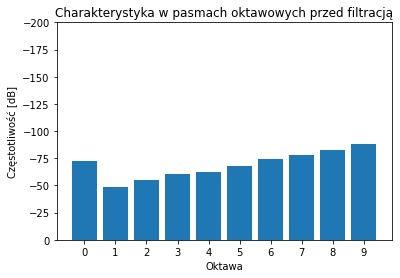

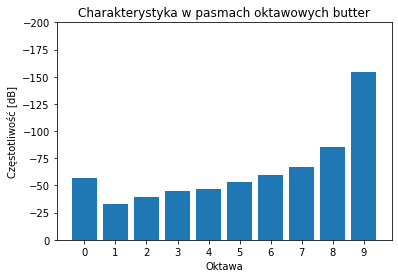

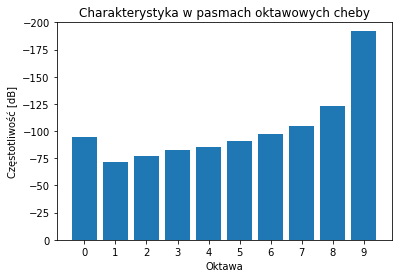

In [84]:
def plot_octaves(y, fs, title, verbose=False):
    # Widmo
    widmo_amp = 20 * np.log10(np.abs(np.fft.rfft(y)) / (len(y)//2))
    # Oś X - częstotliwości
    f = np.fft.rfftfreq(len(y), 1/fs)
    # Częstotliwości środkowe do oktaw
    czestotliwosci_srodkowe = [16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000]
    srednia_z_pasma = []
    for idx, f_o in enumerate(czestotliwosci_srodkowe):
        f_d = f_o * np.power(2, -1/2)
        f_g = f_o * np.power(2, 1/2)
        if verbose:
            print("Oktawa:", idx+1, "częstotliwość dolna:", f_d, "środkowa:", f_o, "górna:", f_g)
        lower_bound = np.argmax(f>f_d)
        upper_bound = np.argmax(f>f_g)
        if upper_bound == 0:
            upper_bound = -1
        srednia_z_pasma.append(np.mean(widmo_amp[lower_bound:upper_bound]))
    
    plt.bar(np.arange(10), srednia_z_pasma)
    plt.ylim([0, -200])
    plt.xticks(np.arange(10))
    plt.xlabel("Oktawa")
    plt.ylabel("Częstotliwość [dB]")
    plt.title(f"Charakterystyka w pasmach oktawowych {title}")
    plt.show()

        
plot_octaves(y, sr, "przed filtracją", verbose=True)
plot_octaves(filtered_y_butter, sr, "butter")
plot_octaves(filtered_y_cheby1, sr, "cheby")

## Tercje

Definiuje się trzy częstotliwości charakterystyczne dla pasma tercji:
- $f_{d}$ - częstotliwość dolna, 
- $f_{o}$ - Częstotliwość środkowa, 
- $f_{g}$ - częstotliwość górna,

które pozostają w nastepujących zależnościach:
$$
\begin{array}{l}
\frac{f_{g}}{f_{d}}=\sqrt[3]{2} \\
f_{d}=f_{o} \cdot \sqrt[-6]{2} \\
f_{g}=f_{o} \cdot \sqrt[6]{2}=f_{d} \cdot \sqrt[3]{2} \\
f_{o}=f_{d} \cdot \sqrt[6]{2}=f_{g} \cdot \sqrt[-6]{2} .
\end{array}
$$

Tercja: 1 częstotliwość dolna: 11.13623397675424 środkowa: 12.5 górna: 14.030775603867163
Tercja: 2 częstotliwość dolna: 14.254379490245428 środkowa: 16 górna: 17.95939277294997
Tercja: 3 częstotliwość dolna: 17.817974362806787 środkowa: 20 górna: 22.44924096618746
Tercja: 4 częstotliwość dolna: 22.27246795350848 środkowa: 25 górna: 28.061551207734325
Tercja: 5 częstotliwość dolna: 28.063309621420686 środkowa: 31.5 górna: 35.35755452174525
Tercja: 6 częstotliwość dolna: 35.635948725613574 środkowa: 40 górna: 44.89848193237492
Tercja: 7 częstotliwość dolna: 44.54493590701696 środkowa: 50 górna: 56.12310241546865
Tercja: 8 częstotliwość dolna: 56.12661924284137 środkowa: 63 górna: 70.7151090434905
Tercja: 9 częstotliwość dolna: 71.27189745122715 środkowa: 80 górna: 89.79696386474984
Tercja: 10 częstotliwość dolna: 89.08987181403393 środkowa: 100 górna: 112.2462048309373
Tercja: 11 częstotliwość dolna: 111.36233976754241 środkowa: 125 górna: 140.30775603867164
Tercja: 12 częstotliwość dol

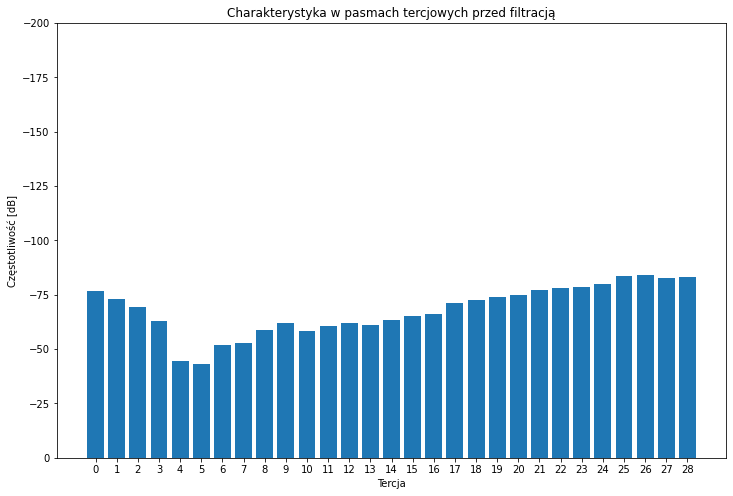

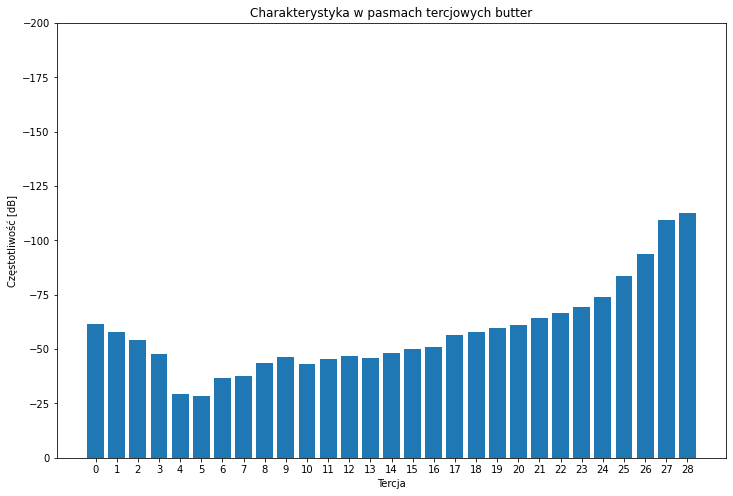

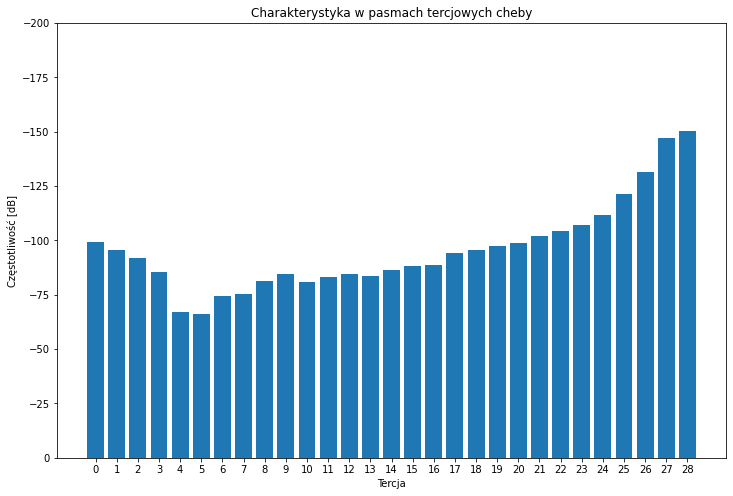

In [91]:
def plot_tert(y, fs, title, verbose=False):
    # Widmo
    widmo_amp = 20 * np.log10(np.abs(np.fft.rfft(y)) / (len(y)//2))
    # Oś X - częstotliwości
    f = np.fft.rfftfreq(len(y), 1/fs)
    # Częstotliwości środkowe do oktaw
    czestotliwosci_srodkowe = [12.5, 16, 20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 80000]
    srednia_z_pasma = []
    for idx, f_o in enumerate(czestotliwosci_srodkowe):
        f_d = f_o * np.power(2, -1/6)
        f_g = f_o * np.power(2, 1/6)
        if verbose:
            print("Tercja:", idx+1, "częstotliwość dolna:", f_d, "środkowa:", f_o, "górna:", f_g)
        lower_bound = np.argmax(f>f_d)
        upper_bound = np.argmax(f>f_g)
        if upper_bound == 0:
            upper_bound = -1
        srednia_z_pasma.append(np.mean(widmo_amp[lower_bound:upper_bound]))
    plt.figure(figsize=(12, 8))
    plt.bar(np.arange(29), srednia_z_pasma)
    plt.ylim([0, -200])
    plt.xticks(np.arange(29))
    plt.xlabel("Tercja")
    plt.ylabel("Częstotliwość [dB]")
    plt.title(f"Charakterystyka w pasmach tercjowych {title}")
    plt.show()

        
plot_tert(y, sr, "przed filtracją", verbose=True)
plot_tert(filtered_y_butter, sr, "butter")
plot_tert(filtered_y_cheby1, sr, "cheby")

## Spektogram

In [85]:
def spectogram(y):
    D = librosa.stft(y)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure()
    librosa.display.specshow(S_db)
    plt.colorbar()

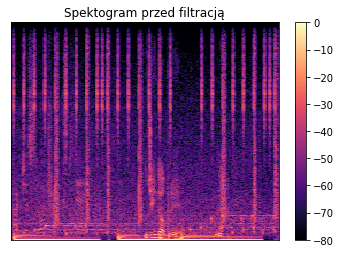

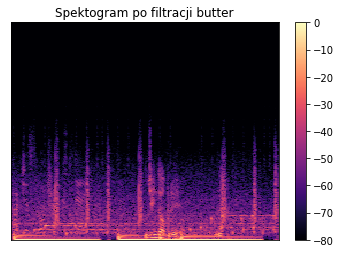

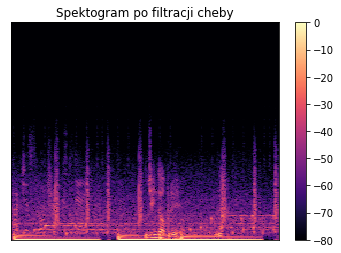

In [86]:
spectogram(y)
plt.title("Spektogram przed filtracją")
plt.show()

spectogram(filtered_y_butter)
plt.title("Spektogram po filtracji butter")
plt.show()

spectogram(filtered_y_cheby1)
plt.title("Spektogram po filtracji cheby")
plt.show()

## Wnioski

